<a href="https://colab.research.google.com/github/hannebel/genetic_algorithm_example/blob/main/Simple_Evo_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melanie Hannebelle - 2021/02/12 - Prakash lab



In [1]:
import math
import random
import numpy as np

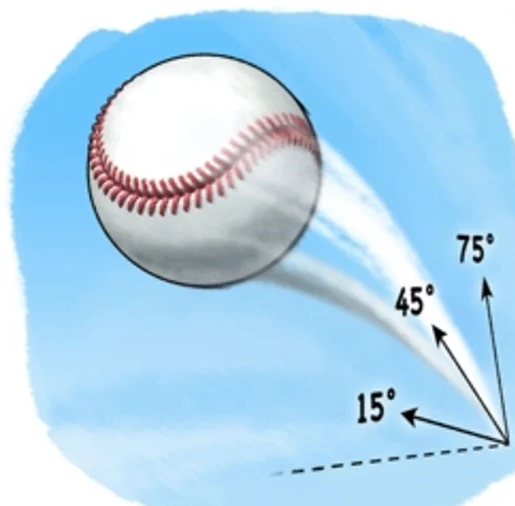

In preparation for the next cricket match, we want to optimise our strategy to throw a ball at a given target. 

Let's write down what a player is and how they throw the ball:

In [2]:
class person():
  speed=0 # initial speed of the ball in m/s
  angle=0 # initial angle of the ball in rad
  distance=0 #distance of the throw

  def simulate_throw(self):
    distance=self.speed**2*math.sin(2*self.angle)/9.81 # simplistic model for a parabolic throw, with the player and the target being at the same height
    return distance


Let's define a person and **simulate** one throw, as a test.

In [3]:
Melanie=person() # so far so good =)
Melanie.speed=3 # throw speed
Melanie.angle=3.14/6 # throw angle in radians
print('The ball reaches the ground at', Melanie.simulate_throw(),' meters')

The ball reaches the ground at 0.7942750821030682  meters


Now let's define what we want, i.e. the **fitness function**: the closest the ball is near the target, the better. So the fitness is going to be the absolute distance to the target. Note the negative sign to ensure that the fitness is maximum (0) when the ball is on target.

In [4]:
target=5 #the distance at which the target is, in meters

def fitness(target,person):
  return -abs(target-person.distance) #we define performance as distance to the target. The higher the fitness the better. Here, we choose the fitness to be <=0, and 0 is the best score achievable

And define the key elements of our evolutionary algorithm: **selection** and **mutation**.




In [5]:
def selection(people,fit_values):
  size_pop=len(people)
  best_ind=sorted(range(0,size_pop), key=lambda i: fit_values[i])[-math.floor(size_pop/2+1):] #get the indices of the best performing half of the population
  new_people=[]

  for i in range(0,len(best_ind)):
    new_people.append(people[best_ind[i]]) #the best 50% make it to the next generation

  for i in range(len(best_ind),size_pop): # the rest is crosses between the best 50%
    parents_ind=random.sample(range(0, len(best_ind)), 2) #pick two parents randomly among the best
    p1=people[parents_ind[0]]
    p2=people[parents_ind[1]]
    person_i=person()
    person_i.speed=(p1.speed+p2.speed)/2 # the child has the average speed of their parents
    person_i.angle=(p1.angle+p2.angle)/2 # the child has the average angle of their parents
    new_people.append(person_i)
  
  return new_people

def mutation(person,mutation_prob,mutation_range):
  if random.random()<mutation_prob:
    person.speed=np.random.normal(person.speed,mutation_range)
    person.speed=max(person.speed,0)
  if random.random()<mutation_prob:
    person.angle=np.random.normal(person.angle,mutation_range)
  return person


... and implement the genetic algorithm. 
This means:
1. generating a random population
2. **simulate** a throw for each
3. evaluate the performance of each (**fitness**)
4. Generate a new population constituted of a **selection** of the best ones and children of those. 
5. **mutate**
6. Go to step 2 with the new population and iterate

In [6]:
size_pop = 50 #size of the population
mutation_prob = 0.2 #probability of mutation
mutation_range= 0.1 # amplitude of the mutation
limit_gen = 10 #number of generations

# Generate a random initial population
people=[]
for i in range(0,size_pop):
  new_person=person()
  new_person.speed=random.random()*20 #generates a random number between 0 and 20
  new_person.angle=random.random()*3.14/2 #generates a random number between 0 abd pi/2 (0 and 90 degrees)
  people.append(new_person)

# Evolve
for n_gen in range(0,limit_gen):

  # Simulation: make every person throw
  for i in range(0,size_pop):
    people[i].distance=people[i].simulate_throw()
  
  # Evaluate the fitness of each
  fit_values=[]
  for i in range(0,size_pop):
    fit_value=fitness(target,people[i])
    fit_values.append(fit_value)
  print('Generation ',n_gen,', fitness=',max(fit_values))
  
  # Selection
  new_people=[]
  new_people=selection(people,fit_values)
  best_person=new_people[0]

  # Mutation
  for i in range(0,size_pop):
    new_people[i]=mutation(new_people[i],mutation_prob,mutation_range)
  
  # Replace old population with the new one
  people=new_people

print('The best person throws at', best_person.distance, 'm , ', (best_person.distance-target)/100,'cm away from the target')
print('The best person throws with an angle of', best_person.angle/3.14*180, ' degrees and a speed of', best_person.speed, 'm/s')

Generation  0 , fitness= -0.9335443213408379
Generation  1 , fitness= -0.03609855113205196
Generation  2 , fitness= -0.03609855113205196
Generation  3 , fitness= -0.03609855113205196
Generation  4 , fitness= -0.010815699793440992
Generation  5 , fitness= -0.018411783917026803
Generation  6 , fitness= -0.008053121396938145
Generation  7 , fitness= -0.004603228882899657
Generation  8 , fitness= -0.0031349741376534013
Generation  9 , fitness= -0.0012670157791792036
The best person throws at 5.130164391164951 m ,  0.0013016439116495082 cm away from the target
The best person throws with an angle of 46.72242793836452  degrees and a speed of 7.100388819392151 m/s


Now, your turn! 

Several things one could add to this algorithm:
- see how the population size, mutation rate and amplitude affect the evolution
- making the physics more realistic: incorporate friction for example
- players try to minimize their energy when throwing the ball
- the players have a given set height from which they throw
- improving the selection process to make the algorithm converge faster
- instead of aiming at a target, the players throw all at the same speed and have a variable throwing angle. If you select for the ones that throw the furthest away, what do you expect the angle to converge to? Compare with the result of an evolution
...

or make something different evolve! 
